In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns


#Pull in data source
spotify = "data.csv"

spotify_data = pd.read_csv(spotify)

#Simplify the dataset to year, artists, and popularity
cleaned_df = spotify_data[["popularity","year","artists","name", "valence", "acousticness", "danceability", "duration_ms",
                           "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "explicit"]]
cleaned_df

,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit
0,4,1921,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954,0
1,5,1921,['Dennis Day'],Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936,0
2,5,1921,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339,0
3,3,1921,['Frank Parker'],Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109,0
4,2,1921,['Phil Regan'],When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029,0
170649,68,2020,['Ashnikko'],Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936,0
170650,76,2020,['MAMAMOO'],AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688,0
170651,70,2020,['Eminem'],Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055,1


In [5]:
#Clean artists column by deleting brackets and quotations
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\]","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\"","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\'","")

cleaned_df

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\4187958532.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\4187958532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\4187958532.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\]","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\4187958532.py:3: SettingWithCopyWarning: 
A

,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954,0
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936,0
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339,0
3,3,1921,Frank Parker,Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109,0
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029,0
170649,68,2020,Ashnikko,Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936,0
170650,76,2020,MAMAMOO,AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688,0
170651,70,2020,Eminem,Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055,1


In [6]:
# Establish the bins.
decade_bins = [1921, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s", "2020s"]
popularity_bins = [0, 20, 40, 60, 80, 100]
labels_2 = ["Below 20", "21-40", "41-60", "61-80","Above 80"]

# Use "pd.cut" to categorize popularity based on the bins.
cleaned_df["Decade"] = pd.cut(cleaned_df["year"], decade_bins, labels=labels, include_lowest=True)
cleaned_df["popularity range"] = pd.cut(cleaned_df["popularity"], popularity_bins, labels=labels_2, include_lowest=True)

#rename name to song title
#cleaned_df = cleaned_df.rename(columns={'name': 'song title'})

cleaned_df.head()

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\3838912959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Decade"] = pd.cut(cleaned_df["year"], decade_bins, labels=labels, include_lowest=True)
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\3838912959.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["popularity range"] = pd.cut(cleaned_df["popularity"], popularity_bins, labels=labels_2, include_lowest=True)


,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Decade,popularity range
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.982,0.279,831667,0.211,0.878000,0.665,-20.096,0.0366,80.954,0,20s,Below 20
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.732,0.819,180533,0.341,0.000000,0.160,-12.441,0.4150,60.936,0,20s,Below 20
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.961,0.328,500062,0.166,0.913000,0.101,-14.850,0.0339,110.339,0,20s,Below 20
3,3,1921,Frank Parker,Danny Boy,0.1650,0.967,0.275,210000,0.309,0.000028,0.381,-9.316,0.0354,100.109,0,20s,Below 20
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.957,0.418,166693,0.193,0.000002,0.229,-10.096,0.0380,101.665,0,20s,Below 20


In [7]:
#Rank the songs by Popularity in each decade
cleaned_df['Rank'] = cleaned_df.groupby(['Decade'])['popularity'].rank(ascending=False, method='first')
cleaned_df

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12532\1823335098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Rank'] = cleaned_df.groupby(['Decade'])['popularity'].rank(ascending=False, method='first')


,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Decade,popularity range,Rank
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954,0,20s,Below 20,459.0
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936,0,20s,Below 20,399.0
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339,0,20s,Below 20,400.0
3,3,1921,Frank Parker,Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109,0,20s,Below 20,522.0
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665,0,20s,Below 20,601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029,0,2020s,61-80,895.0
170649,68,2020,Ashnikko,Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936,0,2020s,61-80,1305.0
170650,76,2020,MAMAMOO,AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688,0,2020s,61-80,546.0
170651,70,2020,Eminem,Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055,1,2020s,61-80,1107.0


# Decade Average as a Whole Compared to Charactertic of Popular Songs

In [8]:
cleaned_df = cleaned_df.rename(columns={'name':'Song Title'})

In [9]:
#get the mean for each popularity group
range_avg = cleaned_df.groupby('popularity range').mean()
range_avg

,popularity,year,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Rank
popularity range,,,,,,,,,,,,,,
Below 20,4.859918,1947.973145,0.508824,0.817233,0.500504,214919.660411,0.294970,0.295768,0.218815,-14.709901,0.147020,110.639637,0.047331,9348.882931
21-40,31.156880,1978.266556,0.555779,0.424466,0.526098,240557.937881,0.522284,0.134873,0.211406,-11.559091,0.066653,118.908773,0.032740,11730.473905
41-60,49.382403,1996.946614,0.529728,0.311317,0.564049,241551.122995,0.602972,0.096137,0.193752,-9.042479,0.078555,120.269755,0.121531,8116.487345
61-80,67.110091,2007.974138,0.505544,0.264480,0.615351,222724.815061,0.622621,0.050393,0.181549,-7.623288,0.095217,120.988885,0.261156,2780.372419
Above 80,84.275046,2016.041894,0.495195,0.250548,0.678193,203792.218579,0.612156,0.013029,0.163251,-6.540594,0.103723,121.894011,0.357013,114.916211


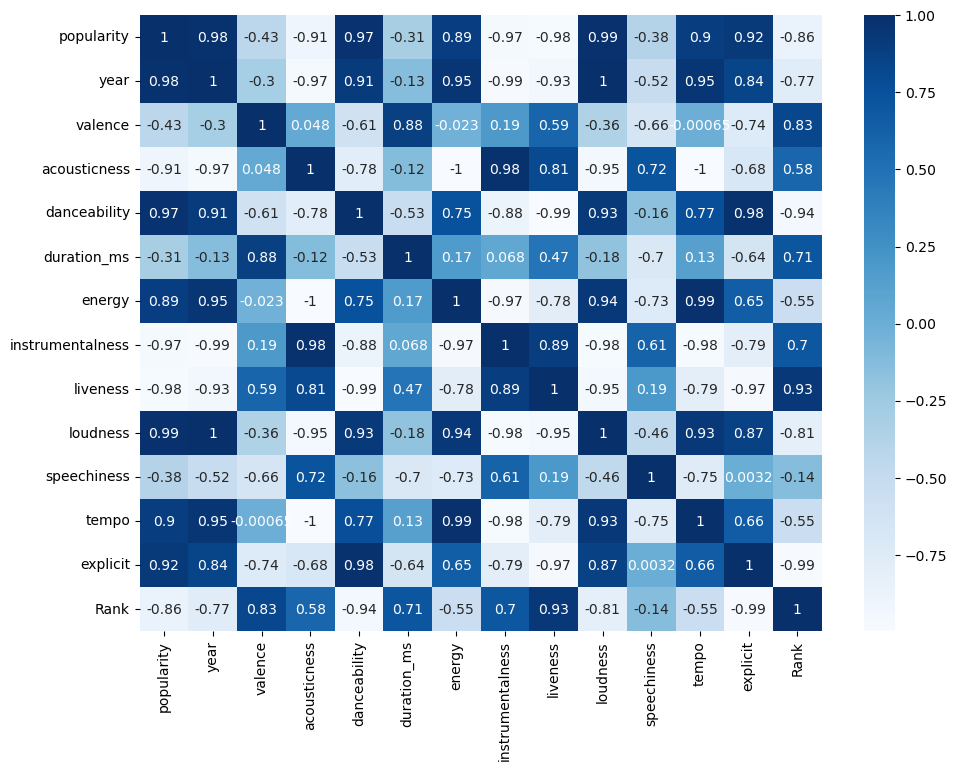

In [44]:
corr = range_avg.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [43]:
range_avg.to_csv('Songs by Popularity Group.csv')

In [11]:
decade_average = cleaned_df.groupby('Decade').mean()
decade_average

,popularity,year,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Rank
Decade,,,,,,,,,,,,,,
20s,1.304331,1926.712837,0.542143,0.801554,0.586963,183769.229419,0.235133,0.377181,0.210910,-16.699090,0.291475,110.431253,0.133632,2563.5
30s,2.536601,1934.089224,0.567896,0.867694,0.541664,207616.599539,0.286655,0.276707,0.225639,-14.214586,0.204065,111.545690,0.061891,4775.0
40s,1.876252,1944.848225,0.487830,0.870974,0.473476,217894.653661,0.254896,0.363176,0.221343,-15.331419,0.153847,107.379639,0.071076,7689.5
50s,10.692091,1954.486146,0.478597,0.840334,0.476858,220482.874358,0.286753,0.247795,0.209219,-14.731226,0.093679,110.972049,0.007758,9925.5
60s,26.551742,1964.565093,0.551939,0.624013,0.494697,211668.431071,0.414520,0.157578,0.208687,-12.676736,0.057731,115.166468,0.000563,9775.0
70s,35.055800,1974.500000,0.585098,0.400162,0.524927,254051.705500,0.533716,0.116031,0.216406,-11.424966,0.059764,119.858574,0.003550,10000.5
80s,37.523426,1984.496222,0.564420,0.298634,0.546385,252120.366045,0.594715,0.122269,0.204639,-11.226990,0.062035,121.345255,0.023224,9925.5
90s,44.192252,1994.497714,0.544997,0.307533,0.566082,248595.562535,0.586066,0.109744,0.196547,-10.004415,0.080528,119.404234,0.115120,9951.0
2000s,49.734348,2004.484933,0.530295,0.269761,0.574142,239517.406953,0.651586,0.083848,0.195582,-7.501916,0.087719,121.254695,0.141301,9823.5


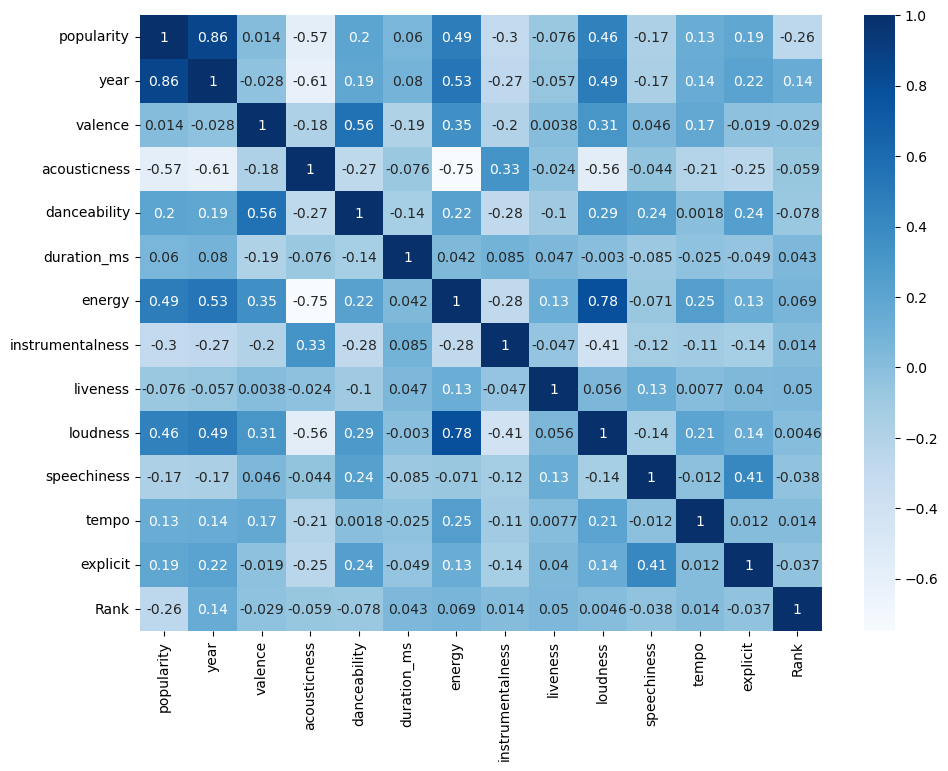

In [12]:
corr = cleaned_df.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [13]:
#Sort out songs for highest popularity of each decade = Top 3 songs each decade
top_artist = cleaned_df.loc[cleaned_df['Rank'] < 4]

top_artist_avg = top_artist.groupby('Decade').mean()
top_artist_avg

,popularity,year,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Rank
Decade,,,,,,,,,,,,,,
20s,50.666667,1927.666667,0.440667,0.751333,0.604667,319791.000000,0.447667,0.297977,0.222333,-13.416000,0.064467,100.149333,0.000000,2.0
30s,59.666667,1934.000000,0.385000,0.907000,0.432000,223725.000000,0.215800,0.003521,0.193333,-11.671667,0.045300,92.302667,0.000000,2.0
40s,72.333333,1943.666667,0.310000,0.804333,0.315333,168604.333333,0.184667,0.119193,0.244667,-15.441000,0.042333,136.110000,0.000000,2.0
50s,76.666667,1958.333333,0.750000,0.851000,0.483333,135960.000000,0.437667,0.000368,0.209000,-13.268000,0.050633,132.170000,0.000000,2.0
60s,83.333333,1965.333333,0.689333,0.471300,0.462000,154644.333333,0.536667,0.000827,0.267000,-9.222667,0.040600,132.665333,0.000000,2.0
70s,85.333333,1977.333333,0.607000,0.043713,0.660333,285858.666667,0.637667,0.002118,0.113833,-8.007000,0.062533,127.668000,0.000000,2.0
80s,84.000000,1982.666667,0.793000,0.190667,0.567667,244897.666667,0.684667,0.004613,0.082333,-7.704000,0.045267,130.066333,0.000000,2.0
90s,84.666667,1992.000000,0.471667,0.269049,0.530667,221653.333333,0.647000,0.003900,0.117667,-7.033667,0.037033,134.499333,0.000000,2.0
2000s,84.000000,2000.666667,0.261667,0.024723,0.511000,260480.000000,0.790667,0.000040,0.174867,-5.444667,0.090833,149.987333,0.333333,2.0


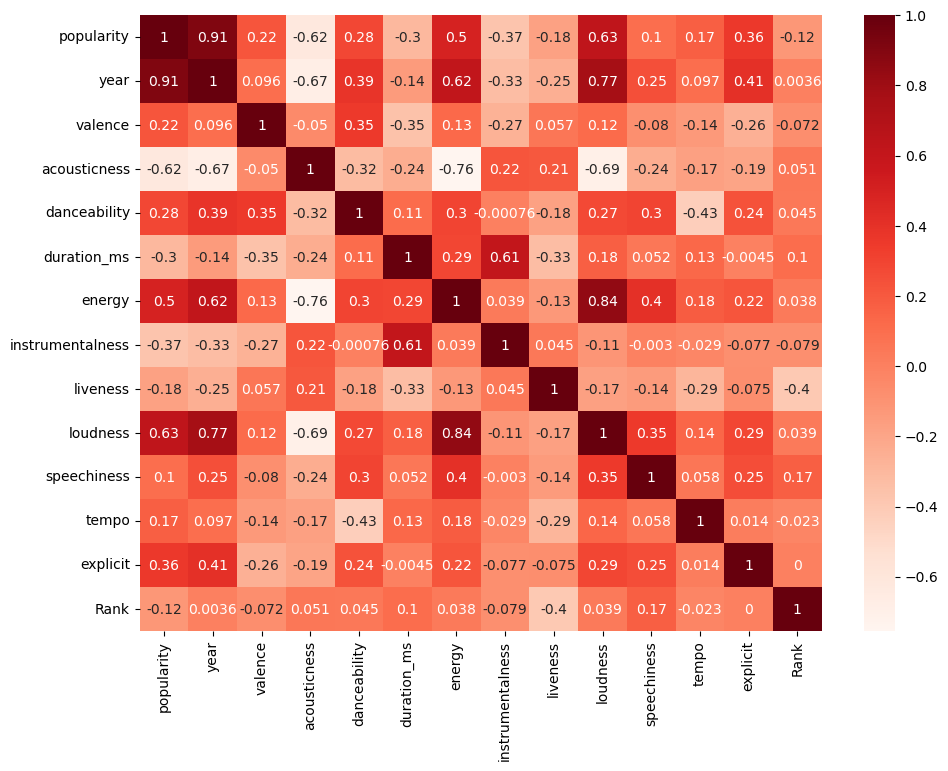

In [14]:
corr = top_artist.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()

In [41]:
#Top 50 songs regardless of the decade
top_alltime = cleaned_df.loc[cleaned_df['popularity'] > 90]
top_alltime_sort = top_alltime.sort_values(by='popularity', ascending=False)

top_alltime_sort

,popularity,year,artists,Song Title,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Decade,popularity range,Rank
19611,100,2020,"Bad Bunny, Jhay Cortez",Dakiti,0.1450,0.40100,0.731,205090,0.573,0.000052,0.1130,-10.059,0.0544,109.928,1,2020s,Above 80,1.0
19606,99,2020,"24kGoldn, iann dior",Mood (feat. iann dior),0.7560,0.22100,0.700,140526,0.722,0.000000,0.2720,-3.558,0.0369,90.989,1,2020s,Above 80,2.0
19618,97,2020,BTS,Dynamite,0.7370,0.01120,0.746,199054,0.765,0.000000,0.0936,-4.410,0.0993,114.044,0,2020s,Above 80,3.0
19608,96,2020,"Cardi B, Megan Thee Stallion",WAP (feat. Megan Thee Stallion),0.3570,0.01940,0.935,187541,0.454,0.000000,0.0824,-7.509,0.3750,133.073,1,2020s,Above 80,4.0
19610,96,2020,Ariana Grande,positions,0.6820,0.46800,0.737,172325,0.802,0.000000,0.0931,-4.771,0.0878,144.015,1,2020s,Above 80,5.0
19612,96,2020,Pop Smoke,What You Know Bout Love,0.5430,0.65000,0.709,160000,0.548,0.000002,0.1330,-8.493,0.3530,83.995,1,2020s,Above 80,6.0
19616,96,2020,The Weeknd,Blinding Lights,0.3340,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0,2020s,Above 80,7.0
19620,95,2020,"Justin Bieber, benny blanco",Lonely (with benny blanco),0.0927,0.86400,0.631,149297,0.239,0.000000,0.1160,-7.071,0.0398,79.859,1,2020s,Above 80,10.0
19607,95,2020,"Pop Smoke, Lil Baby, DaBaby",For The Night (feat. Lil Baby & DaBaby),0.3470,0.11400,0.823,190476,0.586,0.000000,0.1930,-6.606,0.2000,125.971,1,2020s,Above 80,8.0
19623,95,2020,Tate McRae,you broke me first,0.0799,0.78600,0.642,169266,0.374,0.000000,0.0906,-9.386,0.0545,124.099,0,2020s,Above 80,11.0


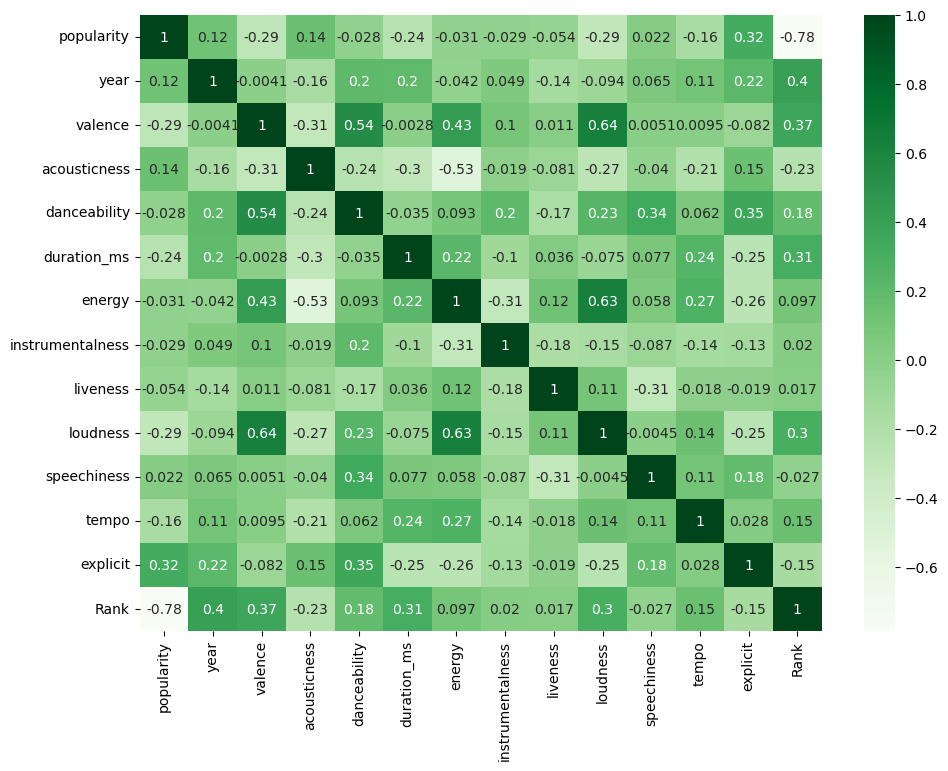

In [42]:
corr = top_alltime_sort.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

# Below Here is Counts in the Rankings of Each Decade and Checks How Popular Songs of Each Era are Related to Characteristics of Popular Songs

In [17]:
cleaned_df.loc[cleaned_df["Decade"] == "30s"].sort_values(by='Rank')

,popularity,year,artists,Song Title,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,explicit,Decade,popularity range,Rank
2206,64,1933,"Billie Holiday, Eddie Heywood",All of Me (with Eddie Heywood & His Orchestra),0.403,0.972,0.504,181440,0.0644,0.000004,0.174,-14.754,0.0408,106.994,0,30s,61-80,1.0
3406,60,1939,Harry James,"It's Been a Long, Long Time",0.375,0.938,0.271,203773,0.2190,0.000860,0.263,-9.767,0.0310,74.680,0,30s,41-60,2.0
1606,55,1930,Joe Quartz,Monster Faladoré,0.377,0.811,0.521,285962,0.3640,0.009700,0.143,-10.494,0.0641,95.234,0,30s,41-60,3.0
3006,54,1937,Robert Johnson,Cross Road Blues,0.638,0.930,0.675,149560,0.3110,0.000261,0.102,-11.959,0.0525,97.159,0,30s,41-60,4.0
3407,54,1939,Glenn Miller,Moonlight Serenade,0.147,0.862,0.342,202760,0.1260,0.099800,0.146,-11.857,0.0265,77.873,0,30s,41-60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155748,0,1930,B. Chagy,Minkomcho,0.163,0.992,0.281,177987,0.1730,0.047500,0.113,-15.958,0.0377,83.204,0,30s,Below 20,9545.0
155749,0,1930,"Markos Vamvakaris, Apostolos Xatzixristos",Ta dio sou xeria,0.870,0.993,0.564,187787,0.3900,0.883000,0.114,-13.142,0.0349,105.900,0,30s,Below 20,9546.0
155750,0,1930,"Igor Stravinsky, Ernest Ansermet, Orchestre De...",Capriccio for Piano and Orchestra: II. Andante...,0.270,0.985,0.243,303177,0.0989,0.908000,0.115,-27.467,0.0318,82.334,0,30s,Below 20,9547.0
155751,0,1930,"Igor Stravinsky, Ernest Ansermet, Orchestre De...",Capriccio for Piano and Orchestra:: III. Alleg...,0.463,0.986,0.456,339409,0.1970,0.683000,0.282,-19.601,0.0392,92.920,0,30s,Below 20,9548.0


In [26]:
#Organize the data
cleaned_final = cleaned_df[["Decade", "popularity", "Rank", "Song Title","artists", "valence", "acousticness", "danceability", "duration_ms",
                           "energy", "instrumentalness", "liveness", "loudness", "tempo", "explicit"]]

In [27]:
#Clean the data to Top 10 songs for each decade by Popularity
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '20s') & (cleaned_final['Rank'] < 514)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '30s') & (cleaned_final['Rank'] < 956)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '40s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '50s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '60s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '70s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '80s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '90s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2000s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2010s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2020s') & (cleaned_final['Rank'] < 204)]

ranked_df = cleaned_final.loc[cleaned_final['popularity'] > 29]
ranked_df

,Decade,popularity,Rank,Song Title,artists,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,explicit
221,20s,42,6.0,Weather Bird,"Louis Armstrong, Earl Hines",0.901,0.98400,0.831,161933,0.2620,0.912000,0.2040,-12.386,104.606,0
222,20s,42,7.0,Nobody Knows You When You're Down and Out,Bessie Smith,0.211,0.99600,0.614,177133,0.0423,0.002930,0.1830,-12.033,89.822,0
224,20s,32,15.0,Ain't Misbehavin',Louis Armstrong,0.503,0.97600,0.665,192600,0.2540,0.002170,0.6440,-9.879,125.734,0
606,20s,37,11.0,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,0.580,0.96900,0.678,194320,0.1750,0.001050,0.1770,-13.021,112.941,0
607,20s,30,17.0,Manhattan Serenade,Tommy Dorsey,0.406,0.98000,0.455,275773,0.0804,0.000317,0.1360,-15.696,77.926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020s,72,895.0,China,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",0.608,0.08460,0.786,301714,0.8080,0.000289,0.0822,-3.702,105.029,0
170649,2020s,68,1305.0,Halloweenie III: Seven Days,Ashnikko,0.734,0.20600,0.717,150654,0.7530,0.000000,0.1010,-6.020,137.936,0
170650,2020s,76,546.0,AYA,MAMAMOO,0.637,0.10100,0.634,211280,0.8580,0.000009,0.2580,-2.226,91.688,0
170651,2020s,70,1107.0,Darkness,Eminem,0.195,0.00998,0.671,337147,0.6230,0.000008,0.6430,-7.161,75.055,1


In [28]:
#Calculate average of each characteristcs by decade
average_ranked = ranked_df.groupby('Decade').mean()
average_ranked

,popularity,Rank,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,explicit
Decade,,,,,,,,,,,,
20s,38.800000,10.5,0.589750,0.927800,0.620600,209330.600000,0.251100,0.257203,0.179045,-13.262750,119.395200,0.000000
30s,37.900000,50.5,0.541727,0.921130,0.574060,177188.040000,0.243082,0.150551,0.215317,-13.615220,111.249530,0.000000
40s,41.879699,67.0,0.512714,0.842483,0.489195,180685.090226,0.250806,0.124115,0.205070,-14.510534,116.003323,0.000000
50s,39.742202,786.0,0.505309,0.787023,0.503471,214747.425843,0.307423,0.124288,0.179206,-13.488610,112.610402,0.000000
60s,40.881863,3179.0,0.565944,0.568540,0.502674,207723.477269,0.439379,0.128262,0.196249,-12.051133,116.088447,0.000157
70s,41.117863,6270.5,0.585551,0.389511,0.530158,255687.075199,0.532986,0.110078,0.202526,-11.290130,119.750098,0.002632
80s,41.473104,7436.5,0.566110,0.300662,0.548589,254624.115519,0.594664,0.118859,0.198281,-11.149106,121.289916,0.022391
90s,44.537743,9744.0,0.544972,0.306826,0.566409,248316.442449,0.586625,0.109302,0.196363,-9.969409,119.387515,0.116437
2000s,49.849439,9800.5,0.530110,0.269516,0.574213,239524.183673,0.651738,0.083631,0.195601,-7.498461,121.258856,0.141633


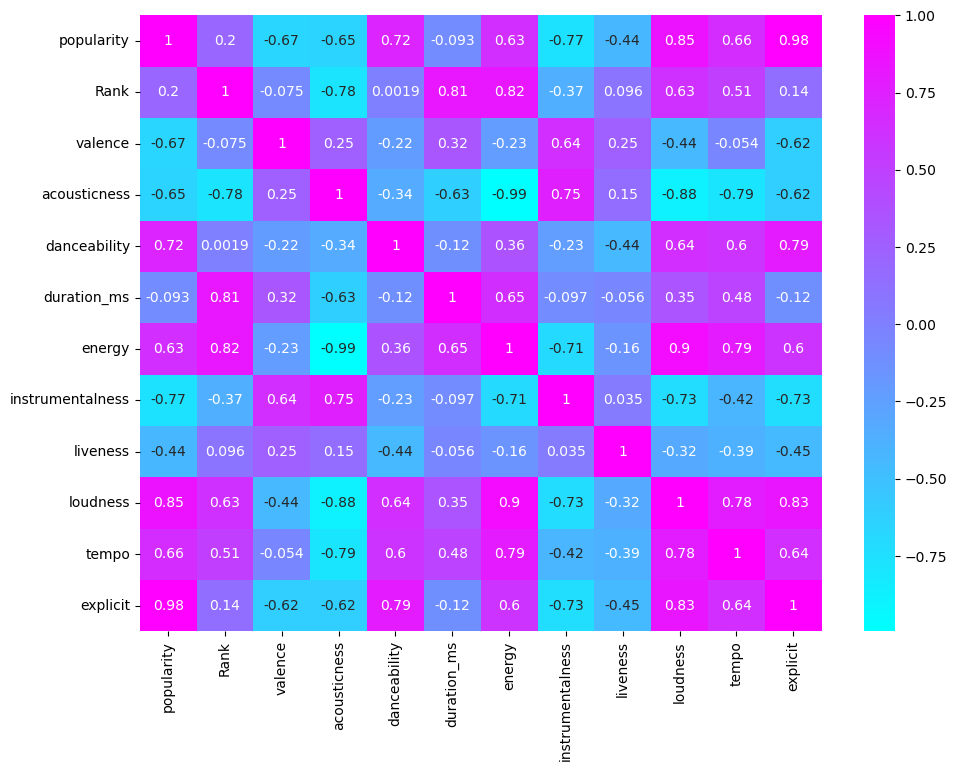

In [29]:
corr = average_ranked.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="cool",annot=True)
plt.show()

In [30]:
ranked_df['Decade'].value_counts()

2000s    19600
90s      19487
2010s    19100
80s      14872
70s      12540
60s       6357
2020s     1830
50s       1571
40s        133
30s        100
20s         20
Name: Decade, dtype: int64

In [31]:
#Pick 10 % of each decade.  Per sample rule, anything over 1000 sample is set at 1000 samples.
#cleaned_final['Decade'].value_counts()

twentys = cleaned_final.loc[cleaned_final['Decade'] == '20s']
twentys_10pct = twentys.loc[cleaned_final['Rank'] < 514]

thirtys = cleaned_final.loc[cleaned_final['Decade'] == '30s']
thirtys_10pct = thirtys.loc[cleaned_final['Rank'] < 955]

fourties = cleaned_final.loc[cleaned_final['Decade'] == '40s']
fourties_10pct = fourties.loc[cleaned_final['Rank'] < 1000]

fifties = cleaned_final.loc[cleaned_final['Decade'] == '50s']
fifties_10pct = fifties.loc[cleaned_final['Rank'] < 1000]

sixties = cleaned_final.loc[cleaned_final['Decade'] == '60s']
sixties_10pct = sixties.loc[cleaned_final['Rank'] < 1000]

seventies = cleaned_final.loc[cleaned_final['Decade'] == '70s']
seventies_10pct = seventies.loc[cleaned_final['Rank'] < 1000]

eighties = cleaned_final.loc[cleaned_final['Decade'] == '80s']
eighties_10pct = eighties.loc[cleaned_final['Rank'] < 1000]

nineties = cleaned_final.loc[cleaned_final['Decade'] == '90s']
nineties_10pct = nineties.loc[cleaned_final['Rank'] < 1000]

two_thousand = cleaned_final.loc[cleaned_final['Decade'] == '2000s']
two_thousand_10pct = two_thousand.loc[cleaned_final['Rank'] < 1000]

two_ten = cleaned_final.loc[cleaned_final['Decade'] == '2010s']
two_ten_10pct = two_ten.loc[cleaned_final['Rank'] < 1000]

two_twenty = cleaned_final.loc[cleaned_final['Decade'] == '2020s']
two_twenty_10pct = two_twenty.loc[cleaned_final['Rank'] < 203]

In [32]:
all_10pct = pd.concat([twentys_10pct, thirtys_10pct, fourties_10pct,fifties_10pct,sixties_10pct,seventies_10pct
                 ,eighties_10pct,nineties_10pct,two_thousand_10pct,two_ten_10pct,two_twenty_10pct], axis=0, join='inner')

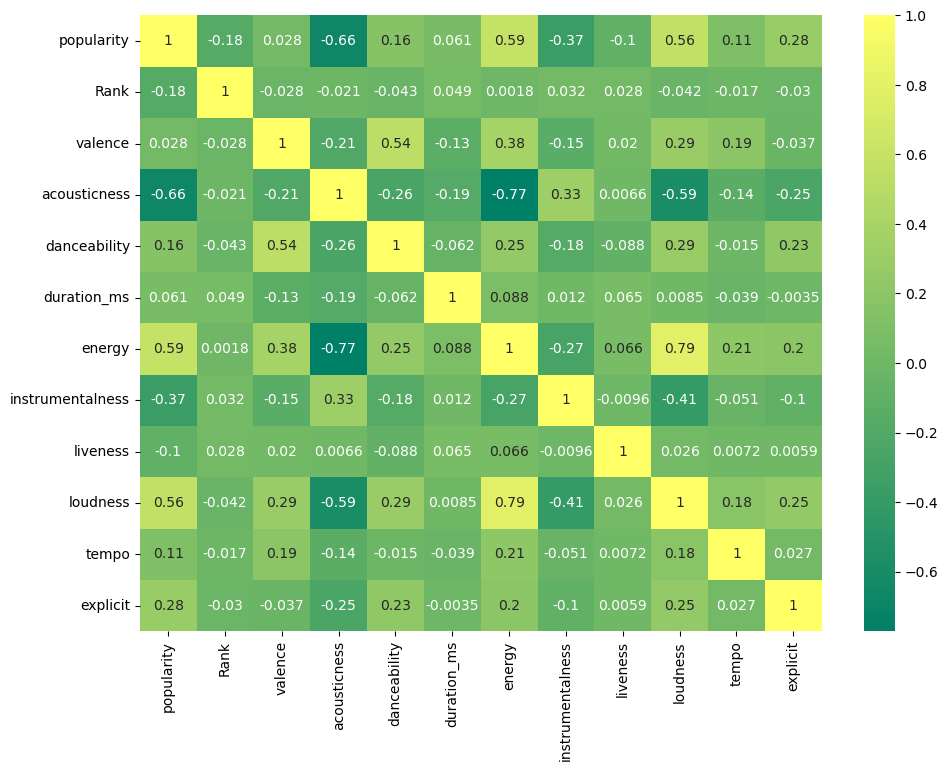

In [33]:
corr = all_10pct.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="summer",annot=True)
plt.show()

In [34]:
all_10pct = all_10pct.groupby('Decade').mean()
all_10pct

,popularity,Rank,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,explicit
Decade,,,,,,,,,,,,
20s,10.832359,257.0,0.610321,0.942273,0.613786,201694.886940,0.247998,0.390171,0.199408,-13.800004,116.181287,0.000000
30s,18.471698,477.5,0.573060,0.795073,0.591096,220935.093291,0.279328,0.195120,0.220743,-14.431007,112.348059,0.002096
40s,19.717718,500.0,0.450447,0.852968,0.481060,211145.615616,0.240881,0.229956,0.217803,-15.724086,111.197799,0.000000
50s,44.323323,500.0,0.508054,0.785319,0.504157,212993.670671,0.310225,0.117121,0.172671,-13.388977,112.581746,0.000000
60s,59.022022,500.0,0.598202,0.506578,0.516112,196015.778779,0.465321,0.072802,0.189373,-11.243734,118.362207,0.001001
70s,64.440440,500.0,0.619520,0.347516,0.563556,251234.639640,0.561692,0.054256,0.172654,-10.494592,120.389149,0.002002
80s,64.836837,500.0,0.610690,0.238569,0.598507,256312.708709,0.641235,0.047396,0.174758,-9.698693,121.847935,0.013013
90s,67.527528,500.0,0.570032,0.218404,0.603464,252412.646647,0.646471,0.042843,0.179609,-8.198291,118.407518,0.139139
2000s,70.604605,500.0,0.555483,0.197853,0.611072,238602.507508,0.703790,0.025376,0.191595,-6.079673,122.063932,0.179179


In [35]:
#Top 3 songs each decade

top_artist_avg['acousticness rate'] = (top_artist_avg['acousticness']/1)*100
top_artist_avg['danceability rate'] = (top_artist_avg['danceability']/1)*100
top_artist_avg['energy rate'] = (top_artist_avg['energy']/1)*100
top_artist_avg['instrumentalness rate'] = (top_artist_avg['instrumentalness']/1)*100
top_artist_avg['liveness rate'] = (top_artist_avg['liveness']/1)*100
top_artist_avg['loudness rate'] = ((top_artist_avg['loudness']+64)/100)*100
top_artist_avg['valence rate'] = (top_artist_avg['valence']/1)*100
top_artist_avg['tempo rate'] = (top_artist_avg['tempo']/243.507)*100

top_artist_avg_sort = top_artist_avg[["acousticness rate","danceability rate","energy rate","instrumentalness rate",
                                     "liveness rate", "loudness rate", "valence rate", "tempo rate"]]
top_artist_avg_sort

,acousticness rate,danceability rate,energy rate,instrumentalness rate,liveness rate,loudness rate,valence rate,tempo rate
Decade,,,,,,,,
20s,75.133333,60.466667,44.766667,29.797667,22.233333,50.584000,44.066667,41.127907
30s,90.700000,43.200000,21.580000,0.352145,19.333333,52.328333,38.500000,37.905550
40s,80.433333,31.533333,18.466667,11.919333,24.466667,48.559000,31.000000,55.895724
50s,85.100000,48.333333,43.766667,0.036772,20.900000,50.732000,75.000000,54.277700
60s,47.130000,46.200000,53.666667,0.082667,26.700000,54.777333,68.933333,54.481117
70s,4.371333,66.033333,63.766667,0.211800,11.383333,55.993000,60.700000,52.428883
80s,19.066667,56.766667,68.466667,0.461333,8.233333,56.296000,79.300000,53.413796
90s,26.904900,53.066667,64.700000,0.390000,11.766667,56.966333,47.166667,55.234278
2000s,2.472333,51.100000,79.066667,0.004033,17.486667,58.555333,26.166667,61.594670


In [36]:
#popularity of 30 or more
average_ranked['acousticness rate'] = (average_ranked['acousticness']/1)*100
average_ranked['danceability rate'] = (average_ranked['danceability']/1)*100
average_ranked['energy rate'] = (average_ranked['energy']/1)*100
average_ranked['instrumentalness rate'] = (average_ranked['instrumentalness']/1)*100
average_ranked['liveness rate'] = (average_ranked['liveness']/1)*100
average_ranked['loudness rate'] = ((average_ranked['loudness']+64)/100)*100
average_ranked['valence rate'] = (average_ranked['valence']/1)*100
average_ranked['tempo rate'] = (average_ranked['tempo']/243.507)*100

average_ranked_sort = average_ranked[["acousticness rate","danceability rate","energy rate","instrumentalness rate",
                                     "liveness rate", "loudness rate", "valence rate", "tempo rate"]]
average_ranked_sort

,acousticness rate,danceability rate,energy rate,instrumentalness rate,liveness rate,loudness rate,valence rate,tempo rate
Decade,,,,,,,,
20s,92.780000,62.060000,25.110000,25.720350,17.904500,50.737250,58.975000,49.031527
30s,92.113000,57.406000,24.308160,15.055057,21.531700,50.384780,54.172700,45.686379
40s,84.248271,48.919549,25.080586,12.411500,20.506992,49.489466,51.271429,47.638599
50s,78.702292,50.347148,30.742323,12.428824,17.920630,50.511390,50.530885,46.245242
60s,56.854041,50.267404,43.937882,12.826204,19.624897,51.948867,56.594370,47.673556
70s,38.951066,53.015827,53.298644,11.007779,20.252641,52.709870,58.555066,49.177271
80s,30.066152,54.858886,59.466410,11.885863,19.828076,52.850894,56.611022,49.809622
90s,30.682622,56.640938,58.662465,10.930227,19.636349,54.030591,54.497150,49.028371
2000s,26.951603,57.421340,65.173812,8.363130,19.560096,56.501539,53.011006,49.796867


In [37]:
#popularity of 30 or more
top_alltime_sort['acousticness rate'] = (top_alltime_sort['acousticness']/1)*100
top_alltime_sort['danceability rate'] = (top_alltime_sort['danceability']/1)*100
top_alltime_sort['energy rate'] = (top_alltime_sort['energy']/1)*100
top_alltime_sort['instrumentalness rate'] = (top_alltime_sort['instrumentalness']/1)*100
top_alltime_sort['liveness rate'] = (top_alltime_sort['liveness']/1)*100
top_alltime_sort['loudness rate'] = ((top_alltime_sort['loudness']+64)/100)*100
top_alltime_sort['valence rate'] = (top_alltime_sort['valence']/1)*100
top_alltime_sort['tempo rate'] = (top_alltime_sort['tempo']/243.507)*100

top_alltime_sort_sort = top_alltime_sort[["acousticness rate","danceability rate","energy rate","instrumentalness rate",
                                     "liveness rate", "loudness rate", "valence rate", "tempo rate"]]
top_alltime_sort_sort

,acousticness rate,danceability rate,energy rate,instrumentalness rate,liveness rate,loudness rate,valence rate,tempo rate
19611,40.100,73.1,57.3,0.005220,11.30,53.941,14.5,45.143671
19606,22.100,70.0,72.2,0.000000,27.20,60.442,75.6,37.366072
19618,1.120,74.6,76.5,0.000000,9.36,59.590,73.7,46.833972
19608,1.940,93.5,45.4,0.000000,8.24,56.491,35.7,54.648532
19610,46.800,73.7,80.2,0.000000,9.31,59.229,68.2,59.142037
...,...,...,...,...,...,...,...,...
19714,0.776,63.0,63.3,0.000000,5.41,56.912,45.2,38.600533
19717,29.700,77.4,37.6,0.000000,16.50,54.628,39.1,50.137778
19728,46.400,69.1,76.5,0.000329,20.30,59.273,85.5,71.464475
19731,15.100,72.1,74.5,0.000124,37.20,60.492,69.9,37.365661


In [38]:
#top 10 pct each decade
all_10pct['acousticness rate'] = (all_10pct['acousticness']/1)*100
all_10pct['danceability rate'] = (all_10pct['danceability']/1)*100
all_10pct['energy rate'] = (all_10pct['energy']/1)*100
all_10pct['instrumentalness rate'] = (all_10pct['instrumentalness']/1)*100
all_10pct['liveness rate'] = (all_10pct['liveness']/1)*100
all_10pct['loudness rate'] = ((all_10pct['loudness']+64)/100)*100
all_10pct['valence rate'] = (all_10pct['valence']/1)*100
all_10pct['tempo rate'] = (all_10pct['tempo']/243.507)*100

all_10pct_sort = all_10pct[["acousticness rate","danceability rate","energy rate","instrumentalness rate",
                                     "liveness rate", "loudness rate", "valence rate", "tempo rate"]]
all_10pct_sort

,acousticness rate,danceability rate,energy rate,instrumentalness rate,liveness rate,loudness rate,valence rate,tempo rate
Decade,,,,,,,,
20s,94.227341,61.378558,24.799838,39.017056,19.940799,50.199996,61.032144,47.711682
30s,79.507317,59.109623,27.932788,19.512012,22.074340,49.568993,57.305954,46.137507
40s,85.296835,48.106026,24.088129,22.995599,21.780250,48.275914,45.044665,45.665134
50s,78.531932,50.415716,31.022461,11.712137,17.267097,50.611023,50.805425,46.233474
60s,50.657809,51.611241,46.532055,7.280164,18.937277,52.756266,59.820210,48.607312
70s,34.751617,56.355556,56.169229,5.425630,17.265355,53.505408,61.951982,49.439708
80s,23.856919,59.850651,64.123482,4.739602,17.475816,54.301307,61.069019,50.038781
90s,21.840371,60.346446,64.647089,4.284297,17.960911,55.801709,57.003213,48.625919
2000s,19.785342,61.107207,70.378986,2.537591,19.159550,57.920327,55.548308,50.127484
